Enter the cryptocurrency (e.g., bitcoin, ethereum): bitcoin
Enter the number of days of data to analyze: 2

Fetching Bitcoin price data for the last 2 days...



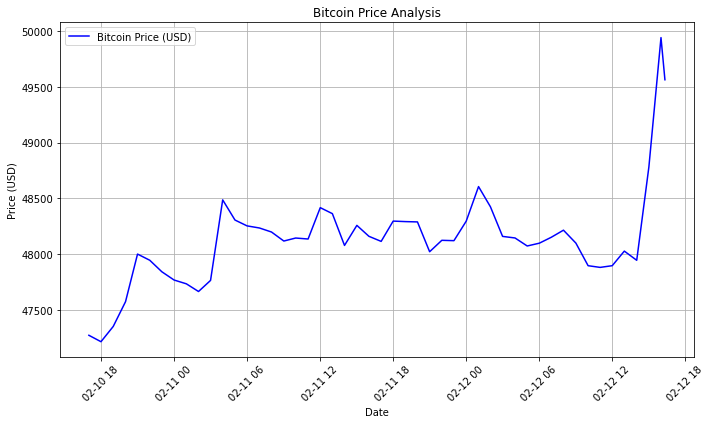

In [1]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

def fetch_data(coin='bitcoin', days=30):
    url = f'https://api.coingecko.com/api/v3/coins/{coin}/market_chart'
    params = {
        'vs_currency': 'usd',
        'days': days
    }
    response = requests.get(url, params=params)
    data = response.json()
    prices = data['prices']
    timestamps, values = zip(*prices)
    timestamps = [datetime.utcfromtimestamp(ts / 1000) for ts in timestamps]
    return timestamps, values

def plot_data(timestamps, values, coin):
    plt.figure(figsize=(10, 6))
    plt.plot(timestamps, values, label=f'{coin.capitalize()} Price (USD)', color='blue')
    plt.title(f'{coin.capitalize()} Price Analysis')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main():
    coin = input("Enter the cryptocurrency (e.g., bitcoin, ethereum): ").lower()
    days = int(input("Enter the number of days of data to analyze: "))
    print(f"\nFetching {coin.capitalize()} price data for the last {days} days...\n")
    timestamps, values = fetch_data(coin, days)
    plot_data(timestamps, values, coin)

if __name__ == "__main__":
    main()
